Biblioteki

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import ReduceLROnPlateau
import shutil
from sklearn.model_selection import train_test_split

Ścieżki i wstępne ustawienia

In [2]:
# Ścieżka do katalogu z obrazami
data_dir_generated = '../graph_generator/4'
data_dir_model = 'graphs'
train_dir = os.path.join(data_dir_model, 'train')
validation_dir = os.path.join(data_dir_model, 'validation')

# Sprawdź, czy katalogi istnieją, jeśli nie, stwórz je
for directory in [data_dir_model, train_dir, validation_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Wielkość obrazów i wielkość partii
img_height, img_width = 180, 180
batch_size = 32

Przenoszenie do katalogów

In [3]:
# Pobierz listę wszystkich katalogów z grafami
all_images_catalogs = os.listdir(data_dir_generated)

for catalog in all_images_catalogs:
    catalog_path = os.path.join(data_dir_generated, catalog)
    all_images = os.listdir(catalog_path)

    # Podziel listę obrazów na zestawy treningowe i walidacyjne
    train_images, validation_images = train_test_split(all_images, test_size=0.2, random_state=42)

    # Stwórz katalogi dla każdej klasy
    train_class_dir = os.path.join(train_dir, catalog)
    validation_class_dir = os.path.join(validation_dir, catalog)
    for directory in [train_class_dir, validation_class_dir]:
        if not os.path.exists(directory):
            os.makedirs(directory)
        else:
            # Jeśli katalog nie jest pusty, wyczyść go
            for file in os.listdir(directory):
                os.remove(os.path.join(directory, file))

    # Kopiuj obrazy do odpowiednich katalogów
    for image in train_images:
        shutil.copy(os.path.join(catalog_path, image), os.path.join(train_class_dir, image))

    for image in validation_images:
        shutil.copy(os.path.join(catalog_path, image), os.path.join(validation_class_dir, image))

Model

In [7]:
# Generowanie danych treningowych
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Generowanie danych walidacyjnych
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  validation_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Tworzenie modelu
model = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(len(train_ds.class_names))
])

# Kompilacja modelu
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

# Trenowanie modelu
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Found 640 files belonging to 4 classes.
Found 160 files belonging to 4 classes.
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.2153 - loss: 1.9280 - val_accuracy: 0.2500 - val_loss: 1.3759
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.3122 - loss: 1.3753 - val_accuracy: 0.6687 - val_loss: 1.2579
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.6440 - loss: 1.1032 - val_accuracy: 0.8125 - val_loss: 0.5014
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.8045 - loss: 0.4627 - val_accuracy: 0.8375 - val_loss: 0.3644
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.9024 - loss: 0.2549 - val_accuracy: 0.7875 - val_loss: 0.4214
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.8786 - loss: 0.2822 - val_accuracy: 0.8625 - val_loss: 0.4536
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.9160 - loss: 0.2044 - val_accuracy: 0.8188 - val_loss: 0.4818
Epoch 8/10
20/20 ━━━━━━━

In [10]:
# Wyświetlanie dokładności na zbiorze treningowym i walidacyjnym
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print("Dokładność na zbiorze treningowym: ", acc)
print("Dokładność na zbiorze walidacyjnym: ", val_acc)

Dokładność na zbiorze treningowym:  [0.22343750298023224, 0.3265624940395355, 0.692187488079071, 0.823437511920929, 0.895312488079071, 0.885937511920929, 0.9203125238418579, 0.9375, 0.979687511920929, 0.9906250238418579]
Dokładność na zbiorze walidacyjnym:  [0.25, 0.668749988079071, 0.8125, 0.8374999761581421, 0.7875000238418579, 0.862500011920929, 0.8187500238418579, 0.875, 0.925000011920929, 0.9125000238418579]


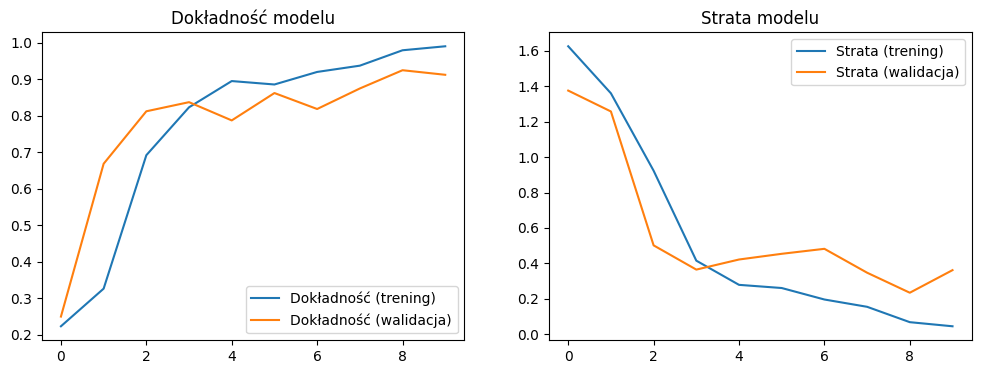

In [11]:
# Wykres dokładności
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Dokładność (trening)')
plt.plot(history.history['val_accuracy'], label='Dokładność (walidacja)')
plt.legend(loc='lower right')
plt.title('Dokładność modelu')

# Wykres straty
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Strata (trening)')
plt.plot(history.history['val_loss'], label='Strata (walidacja)')
plt.legend(loc='upper right')
plt.title('Strata modelu')

plt.show()

In [17]:
# Ścieżka do obrazu, który chcesz przetestować
class_names = train_ds.class_names
test_photo_path = 'test_graphs/'
test_photos = ['rest-directed-9.png', 'unlabeled_undirected-24.png', 'full-113.png', 'path-78.png']
image_path = test_photo_path + test_photos[3]

# Wczytanie obrazu i dostosowanie go do odpowiedniego rozmiaru
img = image.load_img(image_path, target_size=(img_height, img_width))

# Przekształcenie obrazu w tablicę numpy i dodanie dodatkowego wymiaru
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Przewidywanie klasy obrazu
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "Ten obraz najprawdopodobniej należy do klasy {} z prawdopodobieństwem {:.2f} procent."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Ten obraz najprawdopodobniej należy do klasy path z prawdopodobieństwem 100.00 procent.
